In [1]:
##Importing##
import numpy as np
import scipy.stats as stats
import scipy as scipy
from scipy import stats
from scipy.stats import poisson
import sympy.stats as sym
import math
import statistics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import random
from random import randrange
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from datetime import datetime
matplotlib.style.use('ggplot')

<h1>Question 1</h1>

In [2]:
#Reading in my matches.csv file and parsing dates to get the day, month and year the game was played for each game#
Matches = pd.read_csv('matches.csv')
Matches

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,26/07/2020,16:00,Leicester,Man United,0,2,A,0,0,...,2.03,0.50,1.89,2.01,1.88,2.05,1.94,2.05,1.86,2.02
376,E0,26/07/2020,16:00,Man City,Norwich,5,0,H,2,0,...,5.77,-3.75,2.03,1.87,2.01,1.88,2.06,1.88,2.02,1.84
377,E0,26/07/2020,16:00,Newcastle,Liverpool,1,3,A,1,1,...,2.40,1.00,1.94,1.96,1.95,1.97,2.03,2.00,1.95,1.92
378,E0,26/07/2020,16:00,Southampton,Sheffield United,3,1,H,0,1,...,2.01,-0.50,1.97,1.93,2.00,1.93,2.03,1.96,1.98,1.89


In [3]:
#Creating DataFrame for FTR and Date Columns for Pre Covid Games#
##Reference: https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/##
Games = Matches[['Date', 'FTR']]
Games['Date'] = pd.to_datetime(Games['Date'], dayfirst=True)

#Setting data to be gathered between two dates#
Pre_Covid = Games.loc[(Games['Date'] >= '2019/08/08')
                     & (Games['Date'] < '15/03/2020')]
Pre_Covid

C:\Users\evanf\AppData\Local\Temp/ipykernel_14712/2039572658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['Date'] = pd.to_datetime(Games['Date'], dayfirst=True)


,Date,FTR
0,2019-08-09,H
1,2019-08-10,A
2,2019-08-10,D
3,2019-08-10,H
4,2019-08-10,D
...,...,...
283,2020-03-07,D
284,2020-03-07,D
285,2020-03-08,H
286,2020-03-08,H


In [4]:
#Post Covid Games dates#
Games = Matches[['Date', 'FTR']]
Games['Date'] = pd.to_datetime(Games['Date'], dayfirst=True)

# Filter data between two dates
Post_Covid = Games.loc[(Games['Date'] >= '2020/03/17')
                     & (Games['Date'] < '28/07/2020')]
Post_Covid

C:\Users\evanf\AppData\Local\Temp/ipykernel_14712/3364644931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['Date'] = pd.to_datetime(Games['Date'], dayfirst=True)


,Date,FTR
288,2020-06-17,D
289,2020-06-17,H
290,2020-06-19,A
291,2020-06-19,D
292,2020-06-20,D
...,...,...
375,2020-07-26,A
376,2020-07-26,H
377,2020-07-26,A
378,2020-07-26,H


In [5]:
#Getting Home Wins for Pre Covid Games#
HomeWins = Pre_Covid['FTR'].value_counts()['H']
HomeWins

129

In [6]:
#Getting Away Wins for Pre Covid Games#
AwayWins = Pre_Covid['FTR'].value_counts()['A']
AwayWins

87

In [7]:
#Getting Amount of Draws for Pre Covid Games#
Draws = Pre_Covid['FTR'].value_counts()['D']
Draws

72

In [8]:
#Creating a dataframe with each individual value stored and paired with each respective result#
ResultsPreCovid = {"HomeWins": {"H":HomeWins}, "AwayWins":{"A":AwayWins}, "Draws":{"D":Draws}}
df_Results = pd.DataFrame(ResultsPreCovid)

Text(0.5, 1.0, 'Fans at games pre covid')

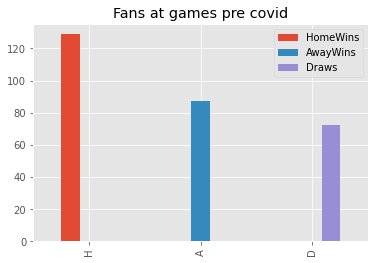

In [9]:
#Pre Covid Bar Chart#
df_Results.plot(kind="bar")
plt.title('Fans at games pre covid')

In [10]:
#Post Covid Home Wins#
HomeWins1 = Post_Covid['FTR'].value_counts()['H']
HomeWins1

43

In [11]:
#Post Covid Away Wins#
AwayWins1 = Post_Covid['FTR'].value_counts()['A']
AwayWins1

29

In [12]:
#Post Covid Draws#
Draws1 = Post_Covid['FTR'].value_counts()['D']
Draws1

20

In [13]:
#Creating a dataframe with each individual value stored and paired with each respective result#
ResultsPostCovid = {"HomeWins1": {"H":HomeWins1}, "AwayWins1":{"A":AwayWins1}, "Draws1":{"D":Draws1}}
df_Results1 = pd.DataFrame(ResultsPostCovid)

Text(0.5, 1.0, 'Fans at games post covid')

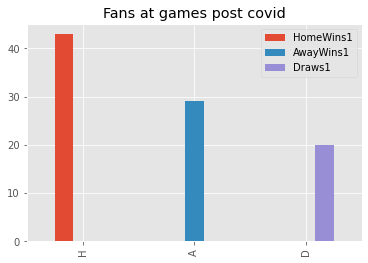

In [14]:
#Post Covid Bar Chart#
df_Results1.plot(kind="bar")
plt.title('Fans at games post covid')

In [15]:
CovidValues = {'Away Wins':[AwayWins,AwayWins1] ,'Draws':[Draws,Draws1],'Home Wins':[HomeWins,HomeWins1]}
CovidAnalysis = pd.DataFrame(CovidValues,index=['Pre-Covid', 'Post-Covid'])
TotalCovid = CovidAnalysis.transpose()
TotalCovid

,Pre-Covid,Post-Covid
Away Wins,87,29
Draws,72,20
Home Wins,129,43


<h4>Conclusion</h4>
<p>In pre covid standards when fans were at stadiums, the outcome of the games proved to be dependent on the fans as post covid, all the results of the teams dropped off significantly. Eg, pre covid wins for away team was 87 and post covid was 29, meaning the outcome of the game was impacted by the fans support for their team</p>

<h3>Conducting Hypothesis Test (Paired Sample T-Test)</h3>
<h5>Hypothesis : $H_0 : \mu_1 = \mu_2$, and $H_1 : \mu_1 \neq \mu_2$</h5>
<h5>Level of significance : $\alpha = 0.05$</h5>
<h5>Decision rule : if pvalue $ < \alpha$ then acccept $H_0$ <br></h5>

In [16]:
#Hypothesis Testing#
stats.ttest_ind?

In [17]:
#Post Covid DataFrame vs Pre Covid DataFrame results based on fans in stadiums#
TotalCovid.head()

,Pre-Covid,Post-Covid
Away Wins,87,29
Draws,72,20
Home Wins,129,43


In [18]:
# Creating Boolean expression for Pre-Covid Games and Post-Covid Games#
#Pre_CovidDF = CovidAnalysis['Away Wins'] == 'Pre-Covid'

In [19]:
#Post_CovidDF = CovidAnalysis['Away Wins'] == 'Post-Covid'

In [20]:
# Create new DataFrames to store Data for both#
#Pre_CovidDF1 = CovidAnalysis[Pre_CovidDF]
#Post_CovidDF1 = CovidAnalysis[Post_CovidDF]

In [21]:
#HomeCounts = CovidAnalysis["Away Wins"].value_counts()
#HomeCounts

In [22]:
#Conducting Hypothesis Test#
t_obs, pvalue = stats.ttest_ind(TotalCovid["Pre-Covid"], TotalCovid["Post-Covid"])
print("tobs :", t_obs, " and two-sided p-value:", pvalue)

tobs : 3.565404771501537  and two-sided p-value: 0.0234720992273364


In [23]:
#Setting P Value for test (if its TRUE, then that means that pre covid games had a bigger impact relying on fans#
pvalue <0.05

True

<h4>Conclusion</h4>
<p>Since pvalue is less than 0.05, we accept $H_0$</p>
<p>We accept $H_0$ because this means that the games were determined by the fans attending the games</p>

<h1>==========================================</h1>

<h1>Question 2</h1>

In [24]:
#Reading In Taylor Swift Tracks Excel Spreadsheet#
#I will be choosing Fearless as the song I will work on#
TaylorSongs = pd.read_excel("TaylorSwiftTracks.xlsx")
TaylorSongs

,name,artist_name,album_name,track_number,popularity,duration_ms,preview_url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,key,spotify_url
0,Mine,Taylor Swift,Speak Now,1,68,230707,NaN,0.00265,0.624,0.757,0.000002,0.1890,-2.940,0.0296,121.070,4,0.658,7,https://open.spotify.com/track/0dBW6ZsW8skfvoR...
1,Sparks Fly,Taylor Swift,Speak Now,2,65,260933,NaN,0.03960,0.605,0.787,0.000001,0.1630,-3.002,0.0308,114.987,4,0.374,5,https://open.spotify.com/track/6d9IiDcFxtFVIvt...
2,Back To December,Taylor Swift,Speak Now,3,69,293027,NaN,0.11700,0.529,0.670,0.000000,0.3340,-4.663,0.0303,141.893,4,0.286,2,https://open.spotify.com/track/3DrjZArsPsoqbLz...
3,Speak Now,Taylor Swift,Speak Now,4,61,240760,NaN,0.09500,0.709,0.599,0.000000,0.0973,-3.734,0.0304,118.975,4,0.735,7,https://open.spotify.com/track/24DefNCFiWTP8Oj...
4,Dear John,Taylor Swift,Speak Now,5,59,403920,NaN,0.16600,0.589,0.470,0.000001,0.1120,-5.320,0.0280,119.386,3,0.102,4,https://open.spotify.com/track/7hZuICN5eaCuQyp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,cowboy like me,Taylor Swift,evermore,11,67,275040,NaN,0.76800,0.604,0.517,0.000155,0.1230,-9.014,0.0347,127.967,4,0.511,0,https://open.spotify.com/track/1XjHRolIXL2M1EE...
276,long story short,Taylor Swift,evermore,12,68,215920,NaN,0.66000,0.546,0.730,0.179000,0.0972,-7.704,0.0417,157.895,4,0.573,0,https://open.spotify.com/track/2o2sgVJIgFXk8GQ...
277,marjorie,Taylor Swift,evermore,13,66,257773,NaN,0.87600,0.535,0.561,0.000136,0.1150,-11.609,0.0484,96.103,4,0.287,5,https://open.spotify.com/track/12ntTeqEeTg7GAV...
278,closure,Taylor Swift,evermore,14,64,180653,NaN,0.83500,0.689,0.704,0.000005,0.1340,-10.813,0.2450,151.884,5,0.920,9,https://open.spotify.com/track/35rdVq36LMHQX0S...


In [25]:
FearlessSongs = TaylorSongs['album_name']
FearlessSongs

0      Speak Now
1      Speak Now
2      Speak Now
3      Speak Now
4      Speak Now
         ...    
275     evermore
276     evermore
277     evermore
278     evermore
279     evermore
Name: album_name, Length: 280, dtype: object

In [26]:
#Locating Taylors "Fearless" Song Name#
print(TaylorSongs.iloc[16,2])

Fearless


In [27]:
#Grouping Taylors "Fearless" Songs using groupby method#
Fearless = TaylorSongs.groupby('album_name')
Fearless.first()

,name,artist_name,track_number,popularity,duration_ms,preview_url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,key,spotify_url
album_name,,,,,,,,,,,,,,,,,,
1989,Welcome To New York,Taylor Swift,1,63,212600,NaN,0.038000,0.793,0.634,0.000002,0.3040,-4.807,0.0324,117.023,4,0.615,7,https://open.spotify.com/track/6qnM0XXPZOINWA7...
Fearless,Fearless,Taylor Swift,1,57,241987,NaN,0.040000,0.594,0.712,0.000000,0.3090,-4.418,0.0273,99.972,4,0.476,5,https://open.spotify.com/track/6Eu31gddWw0gOGO...
Fearless (Taylor's Version),Fearless (Taylor’s Version),Taylor Swift,1,71,241592,NaN,0.012200,0.569,0.741,0.000000,0.3330,-4.963,0.0282,100.118,4,0.430,5,https://open.spotify.com/track/77sMIMlNaSURUAX...
Fearless Platinum Edition,Jump Then Fall,Taylor Swift,1,46,237067,NaN,0.111000,0.618,0.687,0.000000,0.0693,-5.737,0.0271,79.991,4,0.820,2,https://open.spotify.com/track/08gavXombT6KR0a...
Live From Clear Channel Stripped 2008,Love Story - Live From Clear Channel Stripped ...,Taylor Swift,1,38,221028,NaN,0.659000,0.741,0.444,0.000000,0.1310,-7.031,0.0311,119.006,4,0.512,2,https://open.spotify.com/track/4RBKAqJ3qyvvriD...
Lover,I Forgot That You Existed,Taylor Swift,1,74,170640,NaN,0.298000,0.664,0.316,0.000002,0.0812,-10.345,0.5190,92.875,4,0.541,5,https://open.spotify.com/track/43rA71bccXFGD4C...
Red,State Of Grace,Taylor Swift,1,46,295187,NaN,0.000197,0.588,0.825,0.001380,0.0885,-5.882,0.0328,129.968,4,0.397,4,https://open.spotify.com/track/786NsUYn4GGUf8A...
Red (Taylor's Version),State Of Grace (Taylor's Version),Taylor Swift,1,76,295413,NaN,0.000328,0.594,0.713,0.000000,0.1140,-5.314,0.0503,129.958,4,0.328,9,https://open.spotify.com/track/6lzc0Al0zfZOIFs...
Speak Now,Mine,Taylor Swift,1,68,230707,NaN,0.002650,0.624,0.757,0.000002,0.1890,-2.940,0.0296,121.070,4,0.658,7,https://open.spotify.com/track/0dBW6ZsW8skfvoR...


In [28]:
#Using groupby method to get all the Fearless Song results in the csv file on their own#
TotalFearless = Fearless.get_group('Fearless')
TotalFearless

,name,artist_name,album_name,track_number,popularity,duration_ms,preview_url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,key,spotify_url
14,Fearless,Taylor Swift,Fearless,1,57,241987,NaN,0.04000,0.594,0.712,0.000000,0.3090,-4.418,0.0273,99.972,4,0.476,5,https://open.spotify.com/track/6Eu31gddWw0gOGO...
15,Fifteen,Taylor Swift,Fearless,2,59,294333,NaN,0.06700,0.556,0.651,0.000000,0.1450,-4.396,0.0266,95.485,4,0.203,7,https://open.spotify.com/track/4t0OI7XrODjSkAu...
16,Love Story,Taylor Swift,Fearless,3,71,235267,NaN,0.17000,0.618,0.741,0.000000,0.0822,-3.950,0.0310,118.984,4,0.296,2,https://open.spotify.com/track/1vrd6UOGamcKNGn...
17,Hey Stephen,Taylor Swift,Fearless,4,52,254307,NaN,0.19400,0.841,0.544,0.000002,0.1080,-7.347,0.0309,115.994,4,0.831,6,https://open.spotify.com/track/4WXzzCof26KJLTK...
18,White Horse,Taylor Swift,Fearless,5,58,234427,NaN,0.30500,0.578,0.340,0.000000,0.1040,-8.027,0.0264,92.702,4,0.223,0,https://open.spotify.com/track/6wn61Fzx9XMxQmi...
19,You Belong With Me,Taylor Swift,Fearless,6,71,231133,NaN,0.16200,0.687,0.783,0.000013,0.1140,-4.440,0.0386,129.964,4,0.443,6,https://open.spotify.com/track/3GCL1PydwsLodcp...
20,Breathe,Taylor Swift,Fearless,7,49,263973,NaN,0.37900,0.505,0.482,0.000000,0.1130,-7.372,0.0276,73.975,4,0.184,1,https://open.spotify.com/track/49mWEy5MgtNujgT...
21,Tell Me Why,Taylor Swift,Fearless,8,47,200547,NaN,0.05710,0.604,0.855,0.000004,0.3430,-3.097,0.0380,99.960,4,0.510,7,https://open.spotify.com/track/3rnI1UCyGJvUTVv...
22,You're Not Sorry,Taylor Swift,Fearless,9,50,261787,NaN,0.14600,0.475,0.452,0.000001,0.1080,-4.134,0.0270,133.959,4,0.276,6,https://open.spotify.com/track/0HmCuN0Z3OX1Qrz...
23,The Way I Loved You,Taylor Swift,Fearless,10,58,244227,NaN,0.04080,0.433,0.700,0.000000,0.1150,-3.709,0.0336,160.927,4,0.398,5,https://open.spotify.com/track/5P4wWhUYWM0IaVY...


In [29]:
#Now I will create a dataframe and group Taylors New Versions of Fearless into that dataframe#
NewFearlessSongs = TaylorSongs['album_name']
NewFearlessSongs

0      Speak Now
1      Speak Now
2      Speak Now
3      Speak Now
4      Speak Now
         ...    
275     evermore
276     evermore
277     evermore
278     evermore
279     evermore
Name: album_name, Length: 280, dtype: object

In [30]:
#Using iloc to find all the Fearless (Taylors Version)#
print(TaylorSongs.iloc[152,2])

Fearless (Taylor's Version)


In [31]:
#Grouping Taylors "New Version of Fearless" Songs using groupby method#
NewFearlessSongs = TaylorSongs.groupby('album_name')
NewFearlessSongs.first()

,name,artist_name,track_number,popularity,duration_ms,preview_url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,key,spotify_url
album_name,,,,,,,,,,,,,,,,,,
1989,Welcome To New York,Taylor Swift,1,63,212600,NaN,0.038000,0.793,0.634,0.000002,0.3040,-4.807,0.0324,117.023,4,0.615,7,https://open.spotify.com/track/6qnM0XXPZOINWA7...
Fearless,Fearless,Taylor Swift,1,57,241987,NaN,0.040000,0.594,0.712,0.000000,0.3090,-4.418,0.0273,99.972,4,0.476,5,https://open.spotify.com/track/6Eu31gddWw0gOGO...
Fearless (Taylor's Version),Fearless (Taylor’s Version),Taylor Swift,1,71,241592,NaN,0.012200,0.569,0.741,0.000000,0.3330,-4.963,0.0282,100.118,4,0.430,5,https://open.spotify.com/track/77sMIMlNaSURUAX...
Fearless Platinum Edition,Jump Then Fall,Taylor Swift,1,46,237067,NaN,0.111000,0.618,0.687,0.000000,0.0693,-5.737,0.0271,79.991,4,0.820,2,https://open.spotify.com/track/08gavXombT6KR0a...
Live From Clear Channel Stripped 2008,Love Story - Live From Clear Channel Stripped ...,Taylor Swift,1,38,221028,NaN,0.659000,0.741,0.444,0.000000,0.1310,-7.031,0.0311,119.006,4,0.512,2,https://open.spotify.com/track/4RBKAqJ3qyvvriD...
Lover,I Forgot That You Existed,Taylor Swift,1,74,170640,NaN,0.298000,0.664,0.316,0.000002,0.0812,-10.345,0.5190,92.875,4,0.541,5,https://open.spotify.com/track/43rA71bccXFGD4C...
Red,State Of Grace,Taylor Swift,1,46,295187,NaN,0.000197,0.588,0.825,0.001380,0.0885,-5.882,0.0328,129.968,4,0.397,4,https://open.spotify.com/track/786NsUYn4GGUf8A...
Red (Taylor's Version),State Of Grace (Taylor's Version),Taylor Swift,1,76,295413,NaN,0.000328,0.594,0.713,0.000000,0.1140,-5.314,0.0503,129.958,4,0.328,9,https://open.spotify.com/track/6lzc0Al0zfZOIFs...
Speak Now,Mine,Taylor Swift,1,68,230707,NaN,0.002650,0.624,0.757,0.000002,0.1890,-2.940,0.0296,121.070,4,0.658,7,https://open.spotify.com/track/0dBW6ZsW8skfvoR...


In [32]:
#Using groupby method to get all the Fearless Song results in the csv file on their own#
NewTotalFearless = NewFearlessSongs.get_group("Fearless (Taylor's Version)")
NewTotalFearless

,name,artist_name,album_name,track_number,popularity,duration_ms,preview_url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,key,spotify_url
150,Fearless (Taylor’s Version),Taylor Swift,Fearless (Taylor's Version),1,71,241592,NaN,0.012200,0.569,0.741,0.000000,0.3330,-4.963,0.0282,100.118,4,0.430,5,https://open.spotify.com/track/77sMIMlNaSURUAX...
151,Fifteen (Taylor’s Version),Taylor Swift,Fearless (Taylor's Version),2,68,294419,NaN,0.116000,0.559,0.646,0.000000,0.3200,-4.610,0.0272,95.466,4,0.289,7,https://open.spotify.com/track/2nqio0SfWg6gh2e...
152,Love Story (Taylor’s Version),Taylor Swift,Fearless (Taylor's Version),3,74,235767,NaN,0.130000,0.627,0.792,0.000004,0.0845,-4.311,0.0310,119.054,4,0.415,2,https://open.spotify.com/track/6YvqWjhGD8mB5QX...
153,Hey Stephen (Taylor’s Version),Taylor Swift,Fearless (Taylor's Version),4,67,254255,NaN,0.106000,0.788,0.571,0.000000,0.0934,-6.135,0.0296,115.990,4,0.797,6,https://open.spotify.com/track/550erGcdD9n6Pnw...
154,White Horse (Taylor’s Version),Taylor Swift,Fearless (Taylor's Version),5,68,234516,NaN,0.369000,0.423,0.517,0.000000,0.1770,-7.377,0.0486,185.262,4,0.366,0,https://open.spotify.com/track/5YL553x8sHderRB...
155,You Belong With Me (Taylor’s Version),Taylor Swift,Fearless (Taylor's Version),6,79,231124,NaN,0.062300,0.632,0.773,0.000000,0.0885,-4.856,0.0346,130.033,4,0.474,6,https://open.spotify.com/track/1qrpoAMXodY6895...
156,Breathe (feat. Colbie Caillat) (Taylor’s Version),Taylor Swift,Fearless (Taylor's Version),7,66,263377,NaN,0.156000,0.506,0.626,0.000000,0.2280,-6.066,0.0287,148.035,4,0.321,1,https://open.spotify.com/track/7HC7R2D8WjXVcUH...
157,Tell Me Why (Taylor’s Version),Taylor Swift,Fearless (Taylor's Version),8,64,200576,NaN,0.022200,0.578,0.909,0.000000,0.3330,-3.669,0.0628,100.023,4,0.541,7,https://open.spotify.com/track/0k0vFacOHNuArLW...
158,You’re Not Sorry (Taylor’s Version),Taylor Swift,Fearless (Taylor's Version),9,66,261843,NaN,0.053800,0.506,0.444,0.000000,0.1230,-4.990,0.0285,133.873,4,0.241,6,https://open.spotify.com/track/6iiAfo4wTA2CVC3...
159,The Way I Loved You (Taylor’s Version),Taylor Swift,Fearless (Taylor's Version),10,76,243137,NaN,0.003300,0.402,0.732,0.000000,0.1080,-4.665,0.0484,161.032,4,0.472,5,https://open.spotify.com/track/22bPsP2jCgbLUvh...


In [33]:
#Summing up all old versions of fearless popularity into one number#
Sum_OldSongs = TotalFearless['popularity']
Sum_OldSongs

14    57
15    59
16    71
17    52
18    58
19    71
20    49
21    47
22    50
23    58
24    53
25    50
26    45
Name: popularity, dtype: int64

In [34]:
#Summing up all new versions of fearless popularity into one number#
Sum_NewVersion = NewTotalFearless['popularity']
Sum_NewVersion

150    71
151    68
152    74
153    67
154    68
155    79
156    66
157    64
158    66
159    76
160    69
161    64
162    63
163    64
164    64
165    65
166    62
167    61
168    66
169    64
170    64
171    72
172    66
173    68
174    67
175    65
Name: popularity, dtype: int64

In [35]:
#Creating One Combined DataFrame for new and old verisons of Fearless Songs based on the Popularity of the Songs#
Songs = {'Old-Fearless':[Sum_OldSongs],'Taylors-Version':[Sum_NewVersion]}
SongsTotal = pd.DataFrame(Songs,index=['Popularity'])
TotalPopularity = SongsTotal.sum().transpose()
TotalPopularity

Old-Fearless       14    57
15    59
16    71
17    52
18    58
1...
Taylors-Version    150    71
151    68
152    74
153    67
154   ...
dtype: object

<h4>Conducting Hypothesis Test on Fearless Songs comparing Taylors version to the original version</h4>
<h5>I will use a T-test for this as I have two independent samples</h5>
<h5>Hypothesis : $H_0 : \mu_1 = \mu_2$, and $H_1 : \mu_1 \neq \mu_2$</h5>
<h5>Level of significance : $\alpha = 0.05$</h5>
<h5>Decision rule : if pvalue $ < \alpha$ then reject $H_0$ <br></h5>

In [36]:
stats.ttest_ind?

In [37]:
TotalPopularity.head()

Old-Fearless       14    57
15    59
16    71
17    52
18    58
1...
Taylors-Version    150    71
151    68
152    74
153    67
154   ...
dtype: object

In [38]:
#Conducting Hypothesis Test here#
t_obs, pvalue = stats.ttest_ind(TotalPopularity["Old-Fearless"], TotalPopularity["Taylors-Version"])
print("tobs :", t_obs, " and two-sided p-value:", pvalue)

tobs : -5.842037048096022  and two-sided p-value: 1.02759621827781e-06


In [39]:
pvalue < 0.05

True

<h4>Conclusion</h4>
<h5>We Reject H0 since the newer versions of the songs Taylor recorded herself performed better compared to the old original version.</h5>

In [40]:
#Summing up all old versions of fearless liveness into one number#
Sum_OldLiveness = TotalFearless['liveness']
Sum_OldLiveness

14    0.3090
15    0.1450
16    0.0822
17    0.1080
18    0.1040
19    0.1140
20    0.1130
21    0.3430
22    0.1080
23    0.1150
24    0.1100
25    0.1240
26    0.1170
Name: liveness, dtype: float64

In [41]:
#Summing up all new versions of fearless liveness into one number#
Sum_NewLiveness = NewTotalFearless['liveness']
Sum_NewLiveness

150    0.3330
151    0.3200
152    0.0845
153    0.0934
154    0.1770
155    0.0885
156    0.2280
157    0.3330
158    0.1230
159    0.1080
160    0.1430
161    0.1590
162    0.1810
163    0.0897
164    0.1690
165    0.1370
166    0.1020
167    0.3430
168    0.1670
169    0.2960
170    0.1010
171    0.0667
172    0.0779
173    0.0920
174    0.1090
175    0.0995
Name: liveness, dtype: float64

In [42]:
#Creating One Combined DataFrame for new and old verisons of Fearless Songs based on the Liveness of the Songs#
Liveliness = {'Old-Fearless':[Sum_OldLiveness],'Taylors-Version':[Sum_NewLiveness]}
LivelinessTotal = pd.DataFrame(Liveliness,index=['Liveness'])
TotalLiveness = LivelinessTotal.sum().transpose()
TotalLiveness

Old-Fearless       14    0.3090
15    0.1450
16    0.0822
17    0...
Taylors-Version    150    0.3330
151    0.3200
152    0.0845
153 ...
dtype: object

In [43]:
stats.ttest_ind?

In [44]:
TotalLiveness.head()

Old-Fearless       14    0.3090
15    0.1450
16    0.0822
17    0...
Taylors-Version    150    0.3330
151    0.3200
152    0.0845
153 ...
dtype: object

In [45]:
#Conducting Hypothesis Test here#
t_obs, pvalue = stats.ttest_ind(TotalLiveness["Old-Fearless"], TotalLiveness["Taylors-Version"])
print("tobs :", t_obs, " and two-sided p-value:", pvalue)

tobs : -0.5676896329130117  and two-sided p-value: 0.5736745990439065


In [46]:
pvalue < 0.05

False

<h3>Conclusion</h3>
<p>We accept $H_0$ because the pvalue is greater than 0.05 which means the newer version of the songs had more liveliness compared to the old versions.</p>

In [47]:
#Summing up all old versions of fearless energy into one number#
Sum_OldEnergy = TotalFearless['energy']
Sum_OldEnergy

14    0.712
15    0.651
16    0.741
17    0.544
18    0.340
19    0.783
20    0.482
21    0.855
22    0.452
23    0.700
24    0.821
25    0.434
26    0.770
Name: energy, dtype: float64

In [48]:
#Summing up all new versions of fearless energy into one number#
Sum_NewEnergy = NewTotalFearless['energy']
Sum_NewEnergy

150    0.741
151    0.646
152    0.792
153    0.571
154    0.517
155    0.773
156    0.626
157    0.909
158    0.444
159    0.732
160    0.821
161    0.576
162    0.815
163    0.690
164    0.531
165    0.273
166    0.564
167    0.555
168    0.873
169    0.779
170    0.494
171    0.817
172    0.373
173    0.608
174    0.473
175    0.624
Name: energy, dtype: float64

In [49]:
#Creating One Combined DataFrame for new and old verisons of Fearless Songs based on the Energy of the Songs#
Energy = {'Old-Fearless':[Sum_OldEnergy],'Taylors-Version':[Sum_NewEnergy]}
EnergyTotal = pd.DataFrame(Energy,index=['Liveness'])
TotalEnergy = EnergyTotal.sum().transpose()
TotalEnergy

Old-Fearless       14    0.712
15    0.651
16    0.741
17    0.54...
Taylors-Version    150    0.741
151    0.646
152    0.792
153    ...
dtype: object

In [50]:
stats.ttest_ind?

In [51]:
TotalEnergy.head()

Old-Fearless       14    0.712
15    0.651
16    0.741
17    0.54...
Taylors-Version    150    0.741
151    0.646
152    0.792
153    ...
dtype: object

In [52]:
#Conducting Hypothesis Test here#
t_obs, pvalue = stats.ttest_ind(TotalEnergy["Old-Fearless"], TotalEnergy["Taylors-Version"])
print("tobs :", t_obs, " and two-sided p-value:", pvalue)

tobs : -0.03263426671750351  and two-sided p-value: 0.9741416570526553


In [53]:
pvalue < 0.05

False

<h3>Conclusion</h3>
<p>Since pvalue is greater than 0.05, we accept $H_0$ because this means the newer version of the songs had more energy compared to the old versions.</p>

<h3>Short Summary</h3>
<p>I have reached the conclusion that Taylors re-recorded songs of Fearless have performed much better compared to the origignal versions which she did not sing. I reached this conclusion by performing a standard Paired T-Test on the Popularity, Liveness and Energy of both Albums and reached the conclusion that Taylors Version is more preferred compared to the original version.</p>

<h2>Question 3</h2>

In [54]:
#Reading In Taylor Swift Spotify Tracks Excel Spreadsheet#
TaylorSwift = pd.read_excel("TaylorSwiftTracks.xlsx")
TaylorSwift 

,name,artist_name,album_name,track_number,popularity,duration_ms,preview_url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,key,spotify_url
0,Mine,Taylor Swift,Speak Now,1,68,230707,NaN,0.00265,0.624,0.757,0.000002,0.1890,-2.940,0.0296,121.070,4,0.658,7,https://open.spotify.com/track/0dBW6ZsW8skfvoR...
1,Sparks Fly,Taylor Swift,Speak Now,2,65,260933,NaN,0.03960,0.605,0.787,0.000001,0.1630,-3.002,0.0308,114.987,4,0.374,5,https://open.spotify.com/track/6d9IiDcFxtFVIvt...
2,Back To December,Taylor Swift,Speak Now,3,69,293027,NaN,0.11700,0.529,0.670,0.000000,0.3340,-4.663,0.0303,141.893,4,0.286,2,https://open.spotify.com/track/3DrjZArsPsoqbLz...
3,Speak Now,Taylor Swift,Speak Now,4,61,240760,NaN,0.09500,0.709,0.599,0.000000,0.0973,-3.734,0.0304,118.975,4,0.735,7,https://open.spotify.com/track/24DefNCFiWTP8Oj...
4,Dear John,Taylor Swift,Speak Now,5,59,403920,NaN,0.16600,0.589,0.470,0.000001,0.1120,-5.320,0.0280,119.386,3,0.102,4,https://open.spotify.com/track/7hZuICN5eaCuQyp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,cowboy like me,Taylor Swift,evermore,11,67,275040,NaN,0.76800,0.604,0.517,0.000155,0.1230,-9.014,0.0347,127.967,4,0.511,0,https://open.spotify.com/track/1XjHRolIXL2M1EE...
276,long story short,Taylor Swift,evermore,12,68,215920,NaN,0.66000,0.546,0.730,0.179000,0.0972,-7.704,0.0417,157.895,4,0.573,0,https://open.spotify.com/track/2o2sgVJIgFXk8GQ...
277,marjorie,Taylor Swift,evermore,13,66,257773,NaN,0.87600,0.535,0.561,0.000136,0.1150,-11.609,0.0484,96.103,4,0.287,5,https://open.spotify.com/track/12ntTeqEeTg7GAV...
278,closure,Taylor Swift,evermore,14,64,180653,NaN,0.83500,0.689,0.704,0.000005,0.1340,-10.813,0.2450,151.884,5,0.920,9,https://open.spotify.com/track/35rdVq36LMHQX0S...


In [55]:
TaylorSwift.columns.values

array(['name', 'artist_name', 'album_name', 'track_number', 'popularity',
       'duration_ms', 'preview_url', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'time_signature', 'valence', 'key',
       'spotify_url'], dtype=object)

In [56]:
#Removing Dates and Names from the Dataset#

#TaylorSwift.drop(['name','spotify_url','key','artist_name','track_number'], axis=1, inplace=True)#
TaylorSwift.drop(['preview_url'], axis=1, inplace=True)
#TaylorSwift.drop(['album_name','time_signature'], axis=1, inplace=True)
TaylorSwift.head()

,name,artist_name,album_name,track_number,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,key,spotify_url
0,Mine,Taylor Swift,Speak Now,1,68,230707,0.00265,0.624,0.757,0.000002,0.1890,-2.940,0.0296,121.070,4,0.658,7,https://open.spotify.com/track/0dBW6ZsW8skfvoR...
1,Sparks Fly,Taylor Swift,Speak Now,2,65,260933,0.03960,0.605,0.787,0.000001,0.1630,-3.002,0.0308,114.987,4,0.374,5,https://open.spotify.com/track/6d9IiDcFxtFVIvt...
2,Back To December,Taylor Swift,Speak Now,3,69,293027,0.11700,0.529,0.670,0.000000,0.3340,-4.663,0.0303,141.893,4,0.286,2,https://open.spotify.com/track/3DrjZArsPsoqbLz...
3,Speak Now,Taylor Swift,Speak Now,4,61,240760,0.09500,0.709,0.599,0.000000,0.0973,-3.734,0.0304,118.975,4,0.735,7,https://open.spotify.com/track/24DefNCFiWTP8Oj...
4,Dear John,Taylor Swift,Speak Now,5,59,403920,0.16600,0.589,0.470,0.000001,0.1120,-5.320,0.0280,119.386,3,0.102,4,https://open.spotify.com/track/7hZuICN5eaCuQyp...


In [57]:
#REFERENCE: https://www.stackvidhya.com/plot-correlation-matrix-in-pandas-python/#

#Searching for a strong Correlation#
#This is a strong negative correlation as it is close to 0#
TaylorCorrelation = TaylorSwift["popularity"].corr(TaylorSwift["energy"])
TaylorCorrelation 

-0.13905684911053548

In [58]:
#This is a relatively strong negative correlation as it is close to 0#
TaylorCorrelation1 = TaylorSwift["danceability"].corr(TaylorSwift["liveness"])
TaylorCorrelation1 

-0.27302009697123486

In [59]:
#This is a really strong negative correlation as it is super close to 0 so I will use this#
TaylorCorrelation2 = TaylorSwift["danceability"].corr(TaylorSwift["energy"])
TaylorCorrelation2

-0.02681856176226836

In [60]:
#Plotting a Correlation Matrix#
TaylorCorr = TaylorSwift.corr()
TaylorCorr.style.background_gradient(cmap='coolwarm')

,track_number,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,key
track_number,1.000000,-0.322791,0.068869,-0.013024,-0.011756,0.012251,-0.042894,-0.077868,0.017943,-0.101213,0.020634,-0.028852,-0.006198,0.008855
popularity,-0.322791,1.000000,-0.031002,0.116501,0.085019,-0.139057,0.053028,-0.221111,-0.271290,0.216944,-0.014408,0.015314,-0.003950,-0.050409
duration_ms,0.068869,-0.031002,1.000000,-0.032974,-0.278747,-0.146171,-0.069504,0.230170,-0.108608,-0.252442,0.001690,-0.263290,-0.427480,-0.107476
acousticness,-0.013024,0.116501,-0.032974,1.000000,-0.068559,-0.664686,0.139418,-0.084250,-0.680240,-0.008381,-0.127268,0.037234,-0.186236,-0.124241
danceability,-0.011756,0.085019,-0.278747,-0.068559,1.000000,-0.026819,-0.031230,-0.273020,-0.026597,0.114172,-0.255916,0.063738,0.416304,-0.000843
energy,0.012251,-0.139057,-0.146171,-0.664686,-0.026819,1.000000,-0.010619,0.137505,0.759163,0.075397,0.227223,0.120960,0.427628,0.178087
instrumentalness,-0.042894,0.053028,-0.069504,0.139418,-0.031230,-0.010619,1.000000,-0.043816,-0.105429,-0.013649,0.040337,-0.020198,0.019206,0.002979
liveness,-0.077868,-0.221111,0.230170,-0.084250,-0.273020,0.137505,-0.043816,1.000000,0.055635,-0.056952,0.004967,-0.031404,-0.147485,0.094031
loudness,0.017943,-0.271290,-0.108608,-0.680240,-0.026597,0.759163,-0.105429,0.055635,1.000000,-0.107055,0.165382,0.096202,0.284146,0.158250
speechiness,-0.101213,0.216944,-0.252442,-0.008381,0.114172,0.075397,-0.013649,-0.056952,-0.107055,1.000000,0.125635,0.095501,0.181506,0.130823


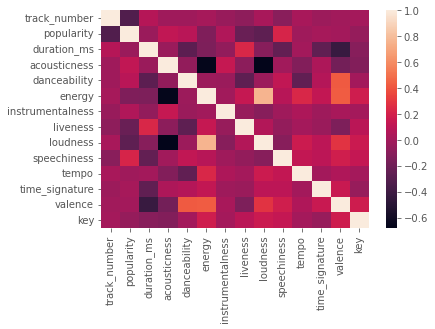

In [61]:
#Plotting a HeatMap#
sns.heatmap(TaylorSwift.corr())
plt.show()

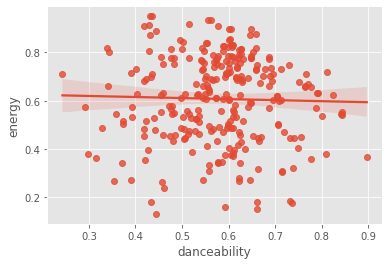

In [62]:
#Viewing selected Correlations and creating a scattermatrix (Linear Regression Models)#
sns.regplot(x=TaylorSwift["danceability"], y=TaylorSwift["energy"])
plt.show()

<AxesSubplot:xlabel='popularity', ylabel='energy'>

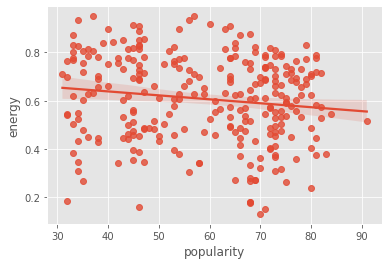

In [63]:
sns.regplot(x=TaylorSwift["popularity"], y=TaylorSwift["energy"])

<AxesSubplot:xlabel='danceability', ylabel='liveness'>

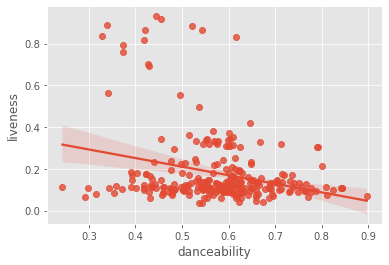

In [64]:
#This is the best Correlation and Model to use#
sns.regplot(x=TaylorSwift["danceability"], y=TaylorSwift["liveness"])

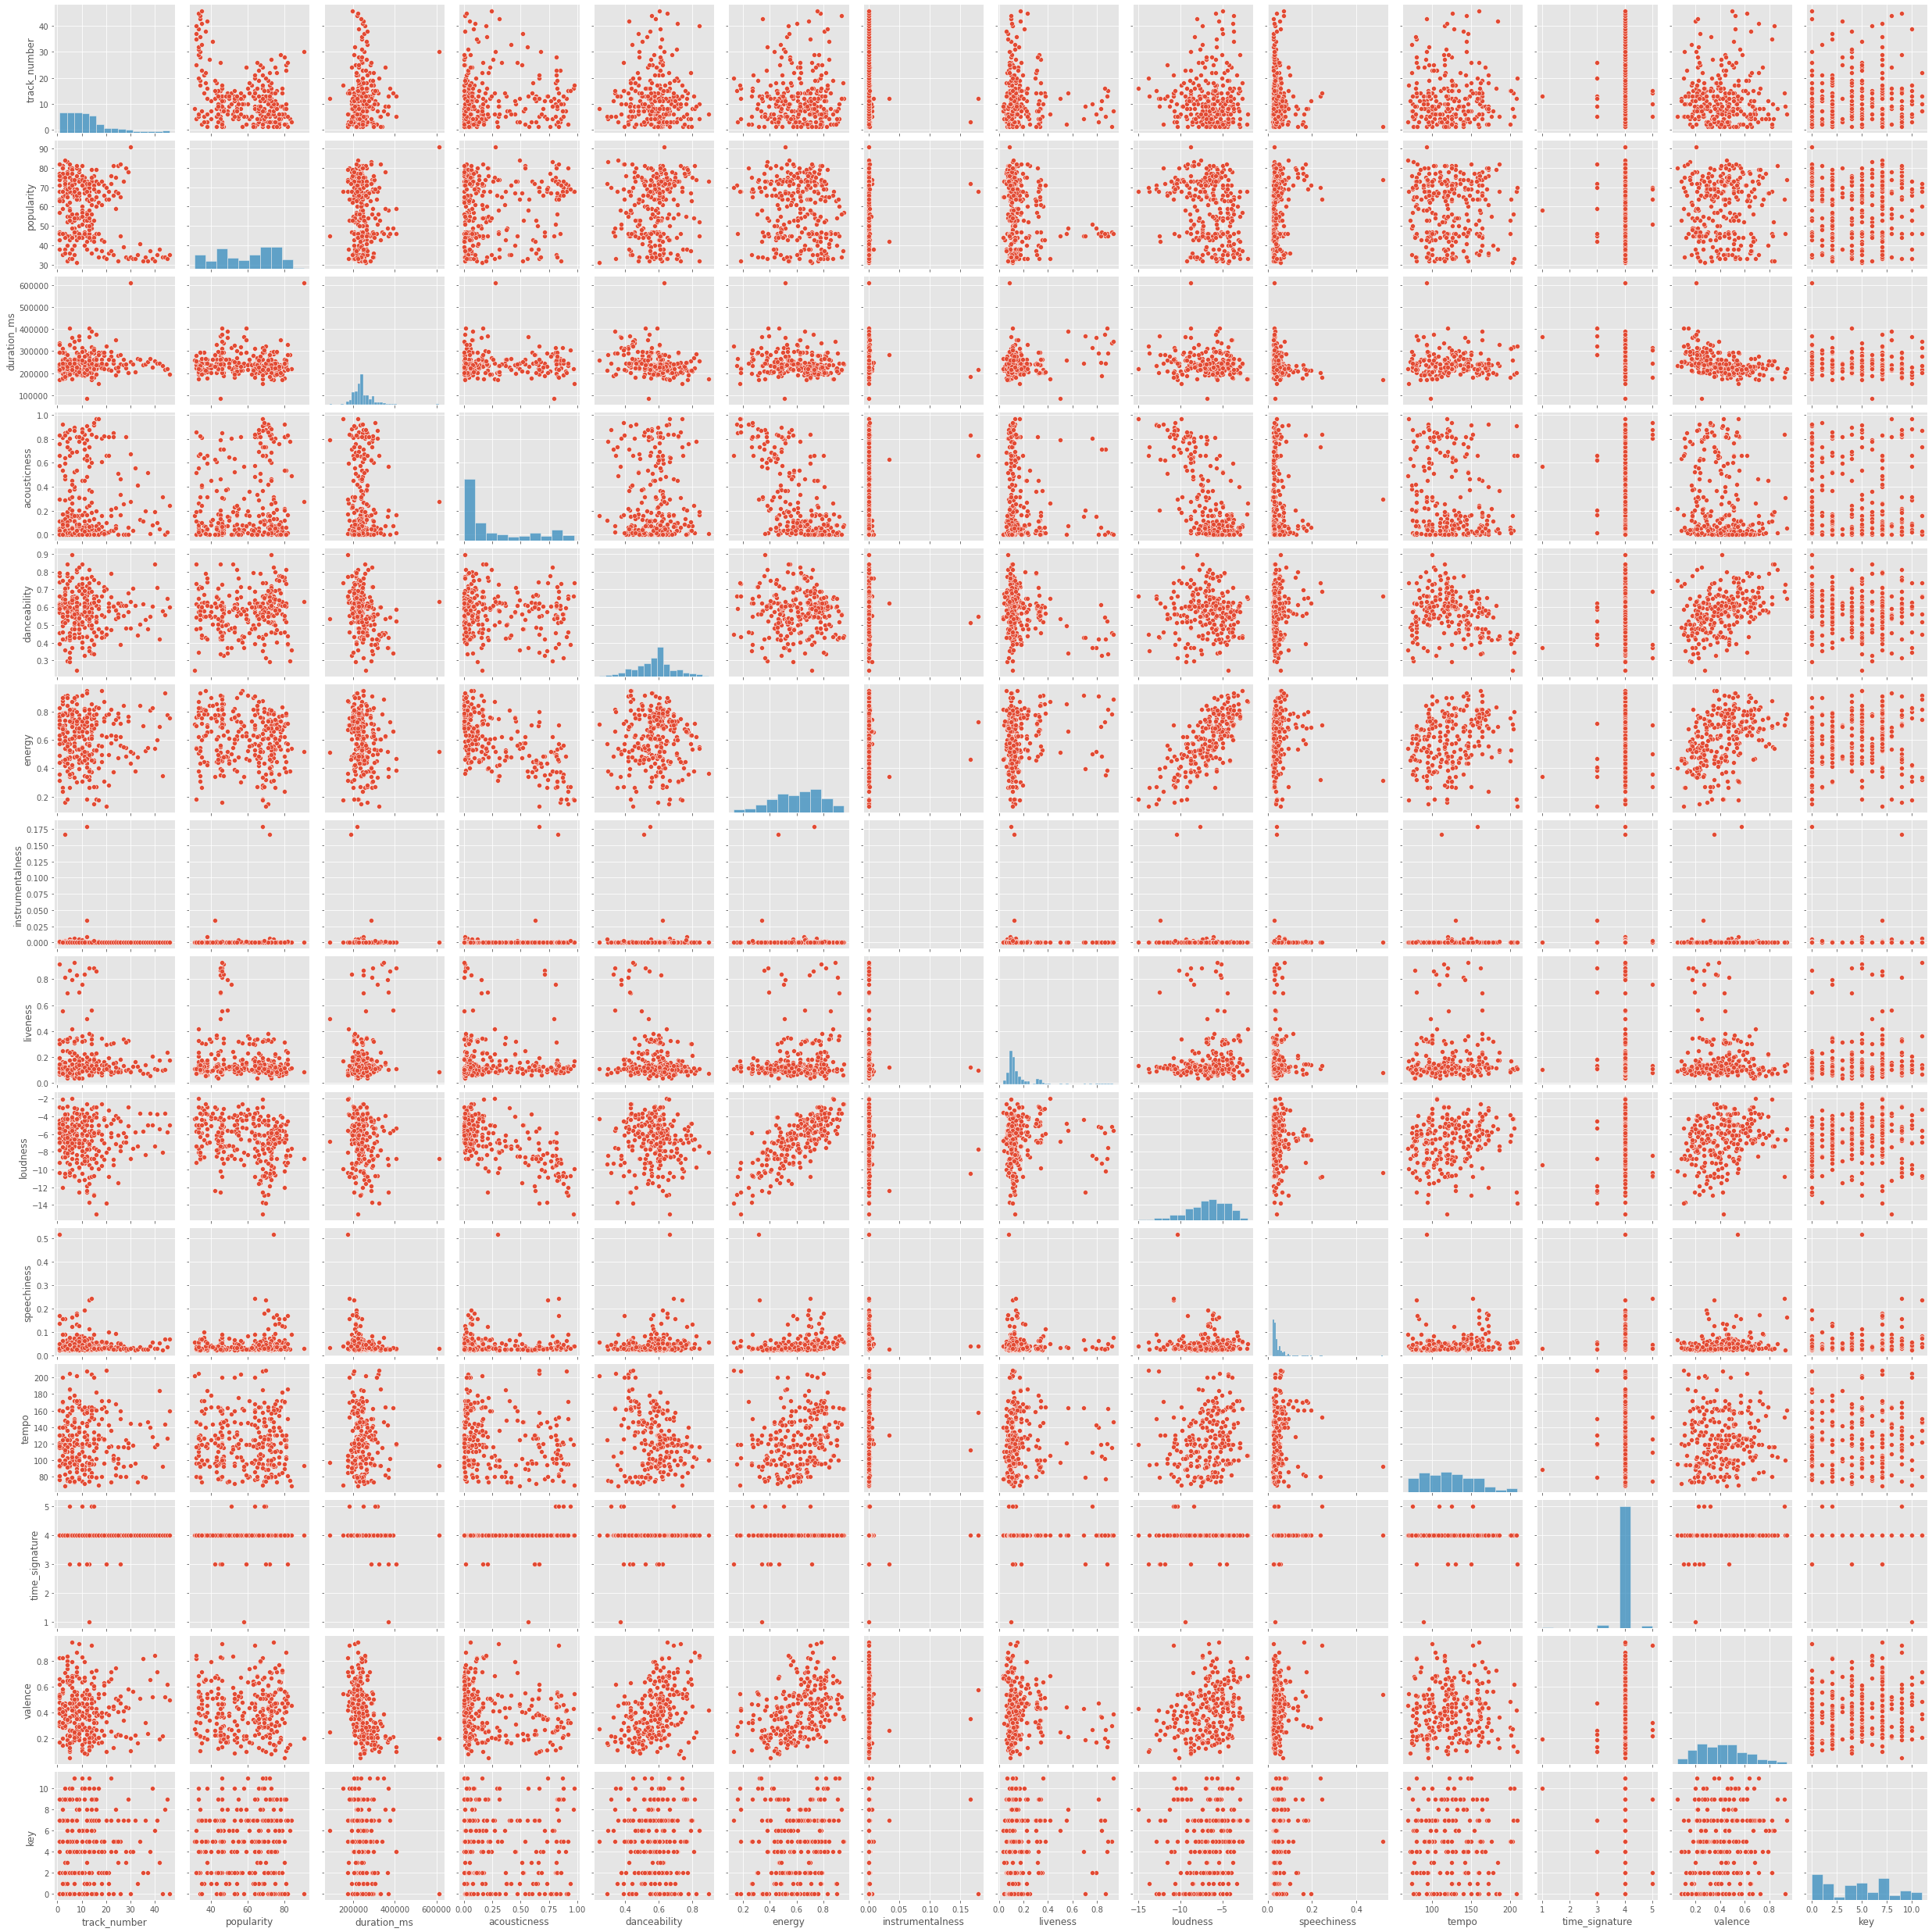

In [65]:
#Showing all the scattermatrix's for TaylorSwift DataFrame#
#THIS COULD TAKE TIME TO LOAD SINCE IT TOOK ME 10 MINUTES TO LOAD WHENEVER I RE-RAN THE KERNEL#
sns.pairplot(TaylorSwift)
plt.show()

In [66]:
#Building a Linear Regression Model (Dependent Variable = Danceability)(Independent Variable = Energy)#
Plotting = np.polyfit(TaylorSwift['danceability'], TaylorSwift['energy'], deg=1) 
Plotting

array([-0.04325216,  0.63269265])

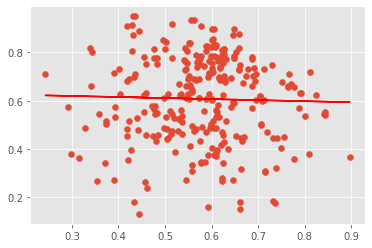

In [67]:
LinModel = np.polyval(Plotting, TaylorSwift['danceability'])
plt.scatter(TaylorSwift['danceability'], TaylorSwift['energy'])
plt.plot(TaylorSwift['danceability'], LinModel,'r');

In [68]:
#Getting Mean-Squared Error and R2 of the Model#
#These variables are taken from Taylors Version of Fearless#
x = np.array([0.56,0.55,0.62,0.78,0.42,0.63,0.50,0.57,0.50,0.40,0.59]) #Danceability
y = np.array([0.74,0.64,0.79,0.57,0.51,0.77,0.62,0.90,0.44,0.73,0.82]) #Energy

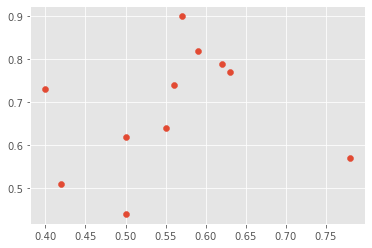

In [69]:
plt.scatter(x,y)
plt.show()

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(x.reshape(-1, 1),y)

LinearRegression()

In [72]:
x,y

(array([0.56, 0.55, 0.62, 0.78, 0.42, 0.63, 0.5 , 0.57, 0.5 , 0.4 , 0.59]),
 array([0.74, 0.64, 0.79, 0.57, 0.51, 0.77, 0.62, 0.9 , 0.44, 0.73, 0.82]))

In [73]:
#Changing colums to be vertical compared to horizontal#
print(x)
print(x.reshape(-1,1))
print(y)

[0.56 0.55 0.62 0.78 0.42 0.63 0.5  0.57 0.5  0.4  0.59]
[[0.56]
 [0.55]
 [0.62]
 [0.78]
 [0.42]
 [0.63]
 [0.5 ]
 [0.57]
 [0.5 ]
 [0.4 ]
 [0.59]]
[0.74 0.64 0.79 0.57 0.51 0.77 0.62 0.9  0.44 0.73 0.82]


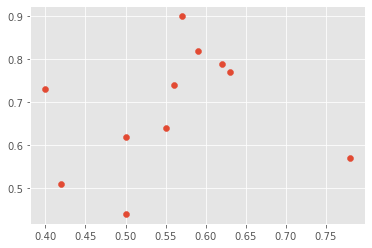

In [74]:
plt.scatter(x,y)
plt.show()

In [75]:
a_0 = lr.intercept_
a_1 = lr.coef_[0]

In [76]:
#Creating Predictions for Model#
predictions = a_0 + a_1*x
predictions

array([0.68551781, 0.68284383, 0.70156168, 0.74434532, 0.64808212,
       0.70423565, 0.66947394, 0.68819179, 0.66947394, 0.64273417,
       0.69353974])

In [77]:
lr.predict(x.reshape(-1,1))

array([0.68551781, 0.68284383, 0.70156168, 0.74434532, 0.64808212,
       0.70423565, 0.66947394, 0.68819179, 0.66947394, 0.64273417,
       0.69353974])

In [78]:
y_pred = lr.predict(x.reshape(-1,1))
y_pred

array([0.68551781, 0.68284383, 0.70156168, 0.74434532, 0.64808212,
       0.70423565, 0.66947394, 0.68819179, 0.66947394, 0.64273417,
       0.69353974])

In [79]:
lr.score?

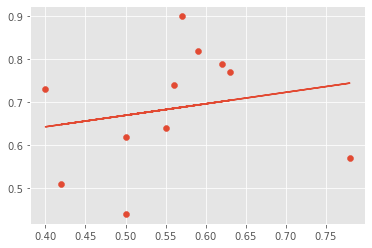

In [80]:
#Plotting Independent and Dependent Variables for Model#
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.show()

In [81]:
#Calculating R2 (r2) and Mean Squared Error (MSE) of the Model#
print('r2 = %.2f' % r2(y, y_pred))
print('mse = %.2f' % mse(y, y_pred))

r2 = 0.04
mse = 0.02


In [82]:
#Viewing Model Statistics#
ModelStats = sm.OLS(y,x).fit()

In [83]:
ModelStats.summary()

C:\Users\evanf\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              175.2
Date:                Sun, 20 Mar 2022   Prob (F-statistic):                    1.16e-07
Time:                        15:01:43   Log-Likelihood:                          4.4069
No. Observations:                  11   AIC:                                     -6.814
Df Residuals:                      10   BIC:                                     -6.416
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2002      0.091     13.236      0.000       0.998       1.402
==============================================================================
Omnibus:                        4.435   Durbin-Watson:                   2.378
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                1.584
Skew:                          -0.871   Prob(JB):                        0.453
Kurtosis:                       3.647   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#Use Model to make some Predictions#
lr.predict(TaylorSwift[["liveness"]])

array([0.58631324, 0.5793609 , 0.62508592, 0.56179287, 0.56572361,
       0.59380038, 0.54532117, 0.58230228, 0.57481514, 0.63203826,
       0.56919979, 0.57561733, 0.56278224, 0.56465402, 0.61840097,
       0.57454774, 0.55775516, 0.56465402, 0.56358443, 0.56625841,
       0.56599101, 0.6274925 , 0.56465402, 0.56652581, 0.56518882,
       0.56893239, 0.5670606 , 0.78124621, 0.68391342, 0.75370424,
       0.72108171, 0.76760892, 0.74835628, 0.78472238, 0.7577152 ,
       0.72322089, 0.73899736, 0.75958699, 0.66867175, 0.77215468,
       0.68632   , 0.77349167, 0.76707413, 0.55430573, 0.56181961,
       0.56679321, 0.60208971, 0.62963168, 0.59941573, 0.61866837,
       0.57428034, 0.5552951 , 0.56438663, 0.56304964, 0.56572361,
       0.56599101, 0.63471224, 0.56599101, 0.56545622, 0.56411923,
       0.57294335, 0.5670606 , 0.57080417, 0.57454774, 0.55176545,
       0.56056284, 0.56411923, 0.64781473, 0.55941303, 0.56545622,
       0.56813019, 0.56149873, 0.5675954 , 0.62134235, 0.56866

In [85]:
lr.predict(TaylorSwift[["loudness"]])

array([-0.25037434, -0.266953  , -0.71110068, -0.46268816, -0.886781  ,
       -0.53033979, -0.42979824, -1.82721891, -0.50119344, -0.31615419,
       -0.87875907, -0.16667884, -1.99781868, -0.61403529, -0.64558823,
       -0.63970547, -0.52044608, -1.42879626, -1.61062673, -0.65147098,
       -1.4354812 , -0.29235579, -0.56964726, -0.45600322, -0.79720275,
       -1.74860397, -0.57927358, -0.85041491, -0.74104922, -0.84292777,
       -0.63355533, -2.19435604, -1.80261832, -0.96940691, -0.86833056,
       -2.82033419, -1.71223788, -1.94754791, -1.2809253 , -1.81304683,
       -0.96085018, -1.46837112, -1.02529304, -0.99828587, -1.28493626,
       -2.34810975, -1.12342802, -1.1015014 , -0.60841994, -0.63997287,
       -0.64077507, -0.5169699 , -1.42906365, -1.60715056, -0.64719261,
       -1.43868997, -0.29208839, -0.56750808, -0.45065526, -0.79934194,
       -1.74646479, -0.58061057, -1.34429857, -1.04026732, -0.46402515,
       -1.93364322, -0.90095308,  0.01354725, -0.2674878 , -0.61

<h3>Comment on How Well the Model Performs</h3>
<p>After plotting the predictions vs the actual data, the Model performs reasonably poor as it is nowhere near the same as the original Model in my "Creating a Scattermatrix" section above the beginning of making this Model where I chose to use the best looking graph and now looks completely different to the original version.</p>

<h2>Question 4</h2>

In [86]:
#Loading in the Diabestes Dataset#
QFourData = datasets.load_diabetes(as_frame=True)
QFourData

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

<h2>Writing about what I see and what I will try to predict</h2>
<h4>I will be trying to predict a users BMI count based on their gender/sex and activity</h4>
<h4>Within this Dataset, it contains plenty of information relating to BMI counts, gender(sex) and ages of people.</h4>

In [87]:
#Viewing all the columns in the dataset#
QFourData.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


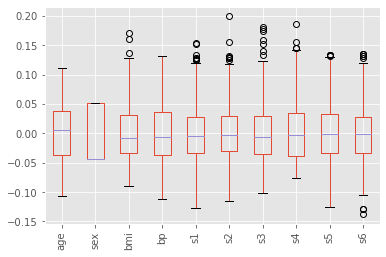

In [88]:
#Creating a Dataframe using the data provided#
dataSet = pd.DataFrame(QFourData.data, columns= QFourData.feature_names)
dataSet.boxplot(rot=90)
dataSet.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.799594,1.064282,1.295620,0.459319,-0.928693,-0.731236,-0.911418,-0.054438,0.418077,-0.370569
1,-0.039522,-0.937474,-1.080955,-0.552885,-0.177423,-0.402430,1.562643,-0.829361,-1.434925,-1.936285
2,1.791277,1.064282,0.933475,-0.119083,-0.957588,-0.718084,-0.679475,-0.054438,0.060139,-0.544537
3,-1.870322,-0.937474,-0.243495,-0.769785,0.256002,0.524802,-0.756789,0.720486,0.476532,-0.196600
4,0.113044,-0.937474,-0.764079,0.459319,0.082632,0.327519,0.170984,-0.054438,-0.671820,-0.979458


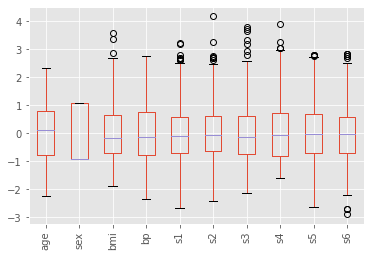

In [89]:
def zscore(s): return (s - s.mean()) / s.std()
normData=dataSet.apply(zscore)
normData.boxplot(rot=90)
normData.head()

In [90]:
#Creating model using only columns 0,1,3,4,5#
#Dropping all unneccessary columns#
dataSet.drop(['bmi','s3','s4','s5','s6'], axis=1, inplace=True)
dataSet.head()

,age,sex,bp,s1,s2
0,0.038076,0.050680,0.021872,-0.044223,-0.034821
1,-0.001882,-0.044642,-0.026328,-0.008449,-0.019163
2,0.085299,0.050680,-0.005671,-0.045599,-0.034194
3,-0.089063,-0.044642,-0.036656,0.012191,0.024991
4,0.005383,-0.044642,0.021872,0.003935,0.015596


In [91]:
#Setting x and y to plot a model#
y = QFourData.target
X = normData

In [92]:
#Creating Linear Model#
lr = LinearRegression()

In [93]:
#Fitting Model#
lr.fit(X,y)

LinearRegression()

Text(0, 0.5, 'Coefficient')

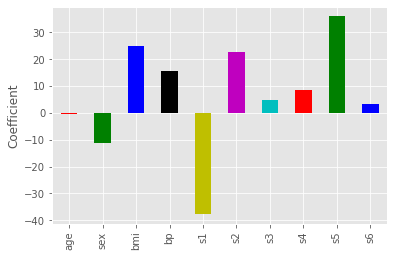

In [94]:
#Viewing my data for Age, Sex, BMI, and the other required S numbers#
coef=pd.Series(lr.coef_ , index=QFourData.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

In [95]:
#Viewing the coef of the data#
lr.coef_

array([ -0.47677132, -11.41995664,  24.75427556,  15.44716322,
       -37.72305532,  22.70218275,   4.81164621,   8.43162744,
        35.77520577,   3.22025649])

In [96]:
#Creating a Table Model#
statslr = sm.OLS(y,sm.add_constant(X)).fit()

C:\Users\evanf\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
statslr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           3.83e-62
Time:                        15:01:46   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age           -0.4768      2.845     -0.168      0.867      -6.069       5.115
sex          -11.4200      2.915     -3.917      0.000     -17.150      -5.690
bmi           24.7543      3.168      7.813      0.000      18.527      30.981
bp            15.4472      3.115      4.958      0.000       9.324      21.570
s1           -37.7231     19.842     -1.901      0.058     -76.722       1.276
s2            22.7022     16.145      1.406      0.160      -9.030      54.434
s3             4.8116     10.121      0.475      0.635     -15.080      24.704
s4             8.4316      7.689      1.097      0.273      -6.682      23.545
s5            35.7752      8.186      4.370      0.000      19.686      51.864
s6             3.2203      3.142      1.025      0.306      -2.955       9.396
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

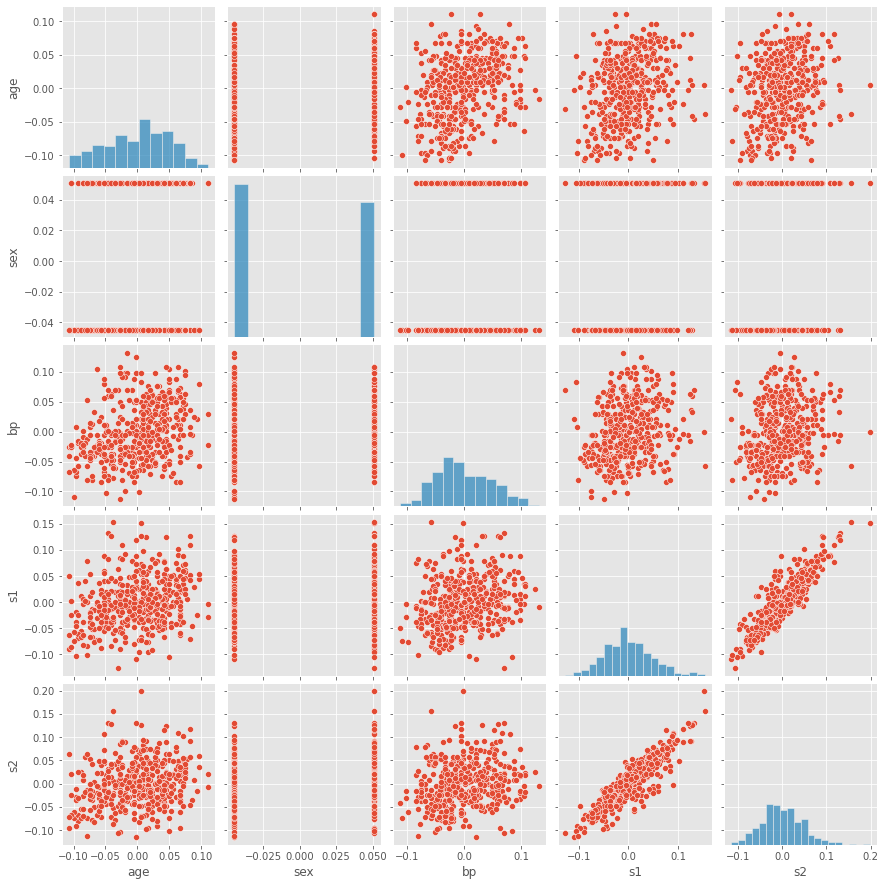

In [98]:
#Getting R2 Score of the Model#
fig = sns.pairplot(data=dataSet)

In [99]:
#Viewing the correlation of the dataset#
dataSet.corr()

,age,sex,bp,s1,s2
age,1.000000,0.173737,0.335427,0.260061,0.219243
sex,0.173737,1.000000,0.241013,0.035277,0.142637
bp,0.335427,0.241013,1.000000,0.242470,0.185558
s1,0.260061,0.035277,0.242470,1.000000,0.896663
s2,0.219243,0.142637,0.185558,0.896663,1.000000


In [100]:
#Using BP as my R2 Score colums to calculate#
onepred = dataSet['bp']

In [101]:
LinearModel = LinearRegression()
LinearModel.fit(onepred.values.reshape(-1,1),y)

LinearRegression()

In [102]:
#Calculating R2 Score#
print("R2 score: ", LinearModel.score(onepred.values.reshape(-1,1),y))

R2 score:  0.19490798886682947


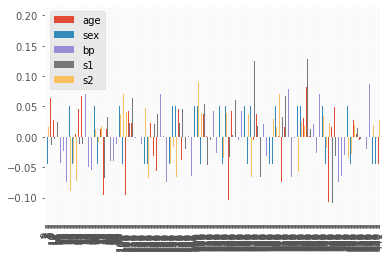

In [122]:
#Showing Graph#
dataSet.plot(kind='bar')
plt.show()

<h3>Comment on how well it will perform</h3>
<p>I believe the model will perform quite poorly as the r2 is super small that this could reflect badly on the outcome of the graph and all the data could be dispersed rather than close together.</p>

In [123]:
#Make some Predictions#
b_1 = lr.intercept_
b_2 = lr.coef_[0]

In [124]:
#Predictions#
predictions = b_1 + b_2*x
predictions

array([151.86649222, 151.87125993, 151.83788594, 151.76160253,
       151.93324021, 151.83311823, 151.8950985 , 151.86172451,
       151.8950985 , 151.94277563, 151.85218908])

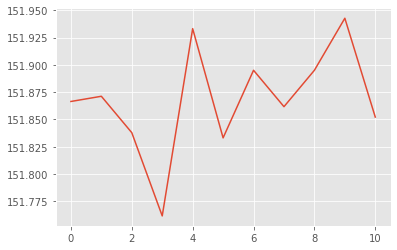

In [125]:
#Showing Graph of Predictions#
plt.plot(predictions)
plt.show()

<h3>Summary</h3>
<p>I imported the dataset which was a local Jupyter Notebook diabetes dataset to view the data and run some tests on the data. After I seperated the data into the require columns of "0,1,3,4 and 5", I was able to calculate the R2 score of the Linear Regression Model that I created using the data from the "bp" column and made a graph of the "dataSet" dataFrame and from there proceed to make some predictions and plot the predictions on a simple graph. I also used the dataSet.corr() function to tview the correlation of the data and proceeded to find out the R2 score of the Linear Model.</p>